### Great job! Now that you’ve seen the practical implementation of KNN Regression, it’s your turn to try it out. Using the Salary_dataset.csv file, predict people’s salaries based on their years of experience and implement KNN Regression on your own.

### **Import all the required libraries**

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###  **Load the dataset**

In [104]:
df = pd.read_csv("Salary_dataset.csv")

### **Let's perform some basic EDA like getting information about dataset, any null value present in column or not, top and last rows etc.**

In [105]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [106]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [107]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [109]:
df = df.drop('Unnamed: 0',axis=1)


In [110]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [111]:
df.shape

(30, 2)

### **Plot a scatter plot and view the realtion between Experience and  Salary**

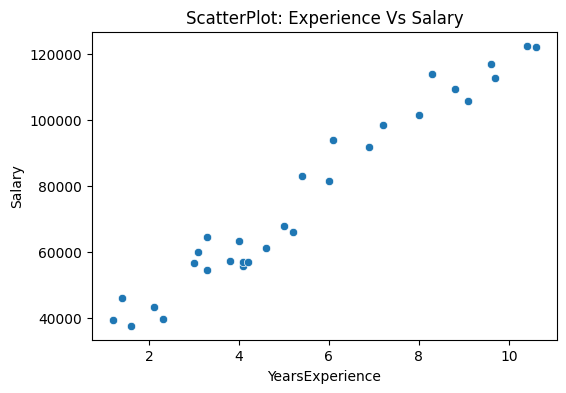

In [112]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='YearsExperience',y='Salary',data=df)
plt.title('ScatterPlot: Experience Vs Salary')
plt.show()

### **Plot a trend line between Years of Experience and Salary**

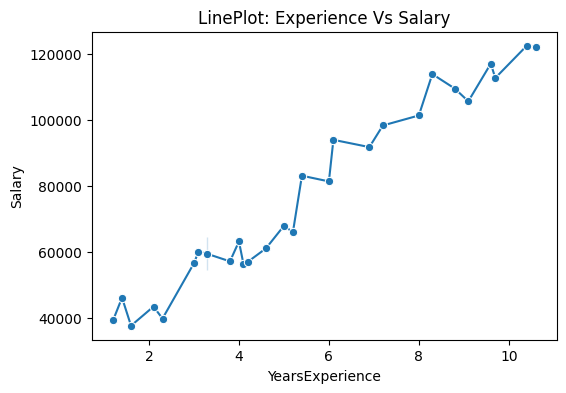

In [113]:
plt.figure(figsize=(6,4))
sns.lineplot(x='YearsExperience',y='Salary',data=df,marker='o')
plt.title('LinePlot: Experience Vs Salary')
plt.show()

### **Plots the distribution of salaries as a histogram with 10 bins and a smooth KDE curve, labeled with a title and x-axis name.**

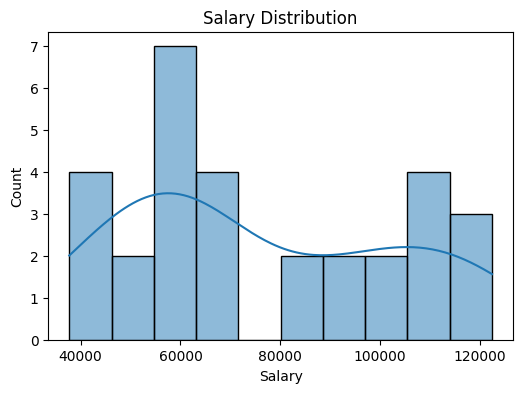

In [114]:
plt.figure(figsize=(6,4))
sns.histplot(df['Salary'],kde=True,bins=10)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.show()

### **Compute the correlation matrix of the DataFrame and visualizes it as a color-coded heatmap with numeric annotations.**

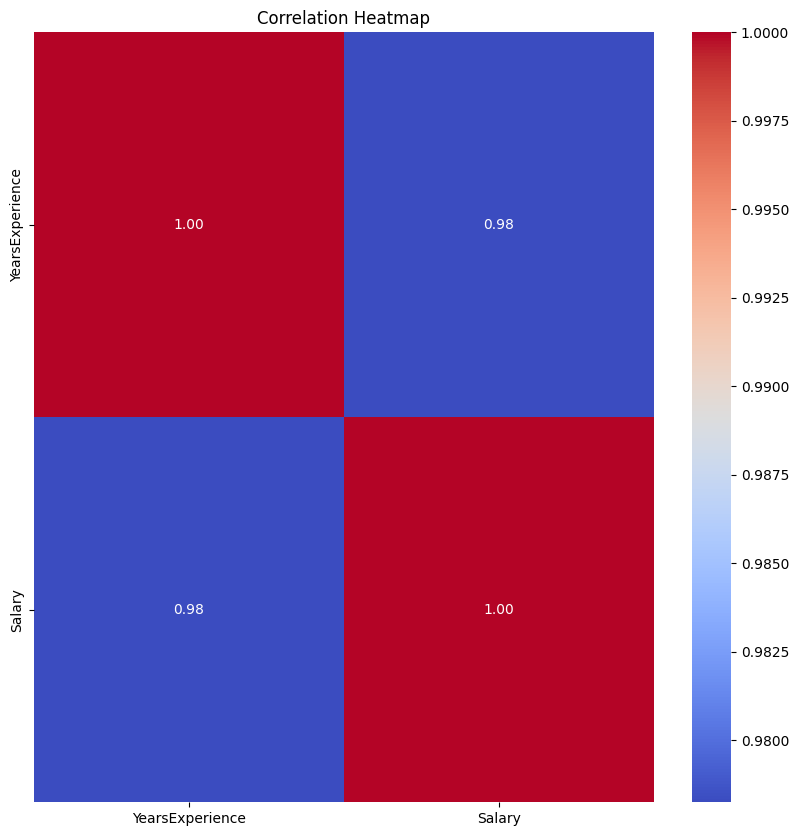

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')
plt.title('Correlation Heatmap')
plt.show()

Now, let's split our dataset into features and target variable:

**X → independent variables (features)**

**y → dependent variable (target)**

This step is called selecting features and target for our model.

In [116]:
X = df.drop('YearsExperience',axis=1)
y = df['Salary']

**After splitting the dataset into X (features) and y (target), the next step is to train our model on a portion of the data.**
Use train_test_split from skelearn.model_selection

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**We know this no that `K-Nearest Neighbors (KNN)` is an algorithm that relies on distance between points. If the features are on different scales, the algorithm may give more importance to features with larger values, which can distort the results.**
we use StandardScaler to scale the features so that all of them contribute equally.

In [118]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### Now, let's create a KNN regression model using sklearn.neighbors"

In [119]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)

### Train X and y feature

In [120]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

### Make prediction on X_test

In [121]:
y_pred = knn.predict(X_test)

### Finally, we have created our KNN model, trained it on X_train and y_train, and made predictions. Now, let's evaluate how well the model is performing using the R² score.

In [122]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9786626474857019

### We vary n_neighbors from 1 to 15, train KNN each time, record the R² score, and pick the value that gives the best performance.

In [123]:
scores = []
for i in range(1,16):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  scores.append(r2_score(y_test,y_pred))

In [124]:
scores

[0.9907434125256284,
 0.9922573948729461,
 0.9786626474857019,
 0.9671913930722136,
 0.9772211463445805,
 0.9678684401988995,
 0.969011183278967,
 0.9557688641120136,
 0.9502569296672971,
 0.9295835613252112,
 0.8681154491158224,
 0.8115420010866194,
 0.7411435654865381,
 0.6730160922020136,
 0.5920177320337068]

### We plot n_neighbors (1–15) on the x-axis against their R² scores on the y-axis to visualize performance changes.

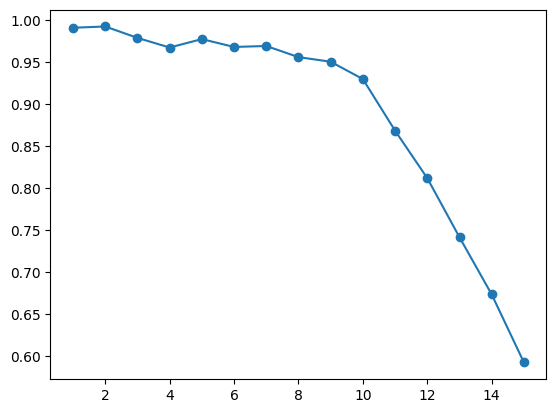

In [125]:
plt.plot(range(1,16),scores,marker='o')